In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as scp
import tensorflow as tf
import random


In [2]:
def gradient_descent(parameters,label,weights,bias,alpha,iterations,size):
    predictions=np.zeros(shape=(size,1))
    for i in iterations:
       for j in size:
           parameter=parameters[j]
           predict=(np.transpose(weights)*parameter)+bias
           predictions[j]=predict
       biasg=0
       weightg=0
       for j in size:
          biasg+=label[j]-(predictions[j]+bias)
          weightg+=predictions[j]*(label[j]-(predictions[j]+bias))

       biasg=(-2/size)*(biasg)
       weightg=(-2/size)*(weightg)
       weights-=alpha*weightg
       bias-=alpha*biasg



In [3]:
def gradientDescent(x,y,w,b,alpha,N):

    dJdw = 0
    dJdb = 0

    for xi,yi in zip(x,y):

        dJdw += -2*xi*(yi - (w*xi + b))
        dJdb += -2*(yi - (w*xi + b))

    w -= alpha*dJdw/N
    b -= alpha*dJdb/N

    return w, b

In [13]:

def predict(x,y,alpha,N,epochs):

     w = random.random()
     b = random.random()

     for i in range(epochs):

        w,b = gradientDescent(x, y,w,b,alpha,N)
        yhat = w*x +b
        J = np.divide(np.sum((y-yhat)**2, axis=0), N)
        print(f'{epochs} loss is {J}, parameters w:{w}, b:{b}')
     return w,b

In [5]:
def LSM(x,y,N):

    sum_xy = 0
    sum_x = 0
    sum_y = 0
    sum_x2 = 0

    for xi,yi in zip(x,y):

        sum_xy += xi*yi
        sum_x += xi
        sum_y += yi
        sum_x2 += xi**2

    m = (N*sum_xy - sum_x*sum_y)/(N*sum_x2 - sum_x**2)
    b = (sum_y - m*sum_x)/N

    return m, b

In [103]:
w = random.random()
b = random.random()
alpha = 0.1

x = np.random.randn(10,1)
print(x)
y = np.random.randn()*x+np.random.randn()
print(y)
N = x.shape[0]
epochs = 100
alpha=0.01

[[-0.83660155]
 [-1.58395787]
 [-0.60930858]
 [-0.64904992]
 [ 1.70969929]
 [ 0.29753942]
 [-0.2538011 ]
 [-0.17516884]
 [ 1.23223754]
 [ 1.33986413]]
[[-1.62946423]
 [-2.38705524]
 [-1.39905859]
 [-1.43934417]
 [ 0.95170701]
 [-0.47979173]
 [-1.0386826 ]
 [-0.95897351]
 [ 0.46770664]
 [ 0.57680713]]


In [104]:
w1,b1=predict(x,y,alpha,N,epochs)
ygd=(x*w1)+b1
print(ygd)

100 loss is [2.027253], parameters w:[0.07063856], b:[0.31299371]
100 loss is [1.94923627], parameters w:[0.08926313], b:[0.29199493]
100 loss is [1.87422258], parameters w:[0.10751929], b:[0.27139857]
100 loss is [1.80209633], parameters w:[0.12541436], b:[0.25119691]
100 loss is [1.73274635], parameters w:[0.14295548], b:[0.23138242]
100 loss is [1.66606573], parameters w:[0.16014967], b:[0.21194768]
100 loss is [1.60195172], parameters w:[0.1770038], b:[0.19288543]
100 loss is [1.54030549], parameters w:[0.1935246], b:[0.17418852]
100 loss is [1.48103204], parameters w:[0.20971868], b:[0.15584998]
100 loss is [1.42404002], parameters w:[0.22559252], b:[0.13786293]
100 loss is [1.36924159], parameters w:[0.24115245], b:[0.12022066]
100 loss is [1.31655231], parameters w:[0.2564047], b:[0.10291657]
100 loss is [1.26589097], parameters w:[0.27135535], b:[0.08594417]
100 loss is [1.21717951], parameters w:[0.28601038], b:[0.06929713]
100 loss is [1.17034286], parameters w:[0.30037565], 

In [105]:
w,b=LSM(x,y,N)
print('weight=',w)
print('bias=',b)
yls=(x*w)+b
#print(yls)

weight= [1.01369453]
bias= [-0.78140581]


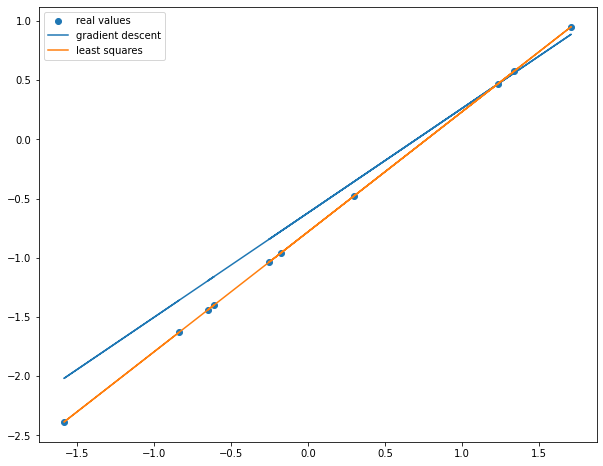

In [106]:




plt.figure(figsize=(10,8))
plt.scatter(x,y,label='real values')
plt.plot(x,ygd,label='gradient descent')

plt.plot(x,yls,label='least squares')

plt.legend()

plt.show()


In [107]:
from sklearn.linear_model import LinearRegression
model=LinearRegression().fit(x,y)
ylr=model.predict(x)
print(ylr)

[[-1.62946423]
 [-2.38705524]
 [-1.39905859]
 [-1.43934417]
 [ 0.95170701]
 [-0.47979173]
 [-1.0386826 ]
 [-0.95897351]
 [ 0.46770664]
 [ 0.57680713]]


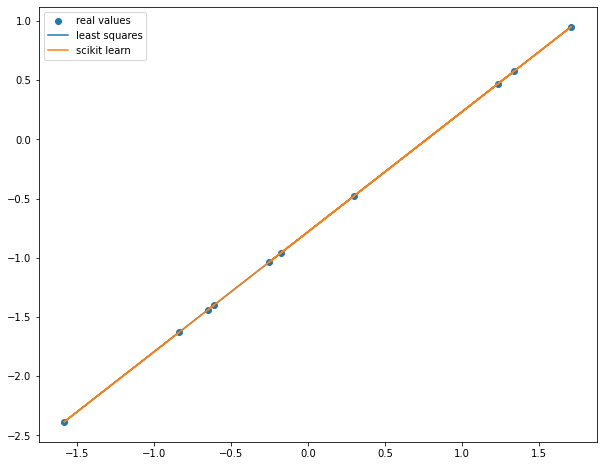

In [154]:
plt.figure(figsize=(10,8))
plt.scatter(x,y,label='real values')
plt.plot(x,yls,label='least squares')
plt.plot(x,ylr,label='scikit learn')
plt.legend()
plt.show()

In [150]:
nn=tf. keras . models . Sequential ()
nn . add ( tf. keras . layers . Dense ( units =24 , input_dim =1 ,
activation =tf. nn. relu ))
nn . add ( tf. keras . layers . Dense ( units =32 , activation =tf. nn. relu ))
#nn . add ( tf. keras . layers . Dense ( units =12 , activation =tf. nn. relu ))
nn . add ( tf. keras . layers . Dense ( units =1 , activation =tf.nn.relu))


In [151]:
nn . compile ( optimizer =tf. keras . optimizers . Adam ( learning_rate =0.001),
loss =tf. keras . losses .MSE )

In [152]:
nn . fit ( x=x, y=y ,batch_size=32, epochs =epochs , verbose =1)


Epoch 1/100
1/1 [==============================] - 1s 775ms/step - loss: 1.6400
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 1.6158
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 1.5930
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 1.5731
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 1.5551
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 1.5427
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 1.5350
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 1.5302
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 1.5255
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 1.5212
Epoch 11/100
1/1 [==============================] - 0s 8ms/step - loss: 1.5170
Epoch 12/100
1/1 [==============================] - 0s 8ms/step - loss: 1.5131
Epoch 13/100
1/1 [==============================] - 0s 8ms/

In [156]:
ynn=nn.predict(x)

1/1 [==============================] - 0s 28ms/step


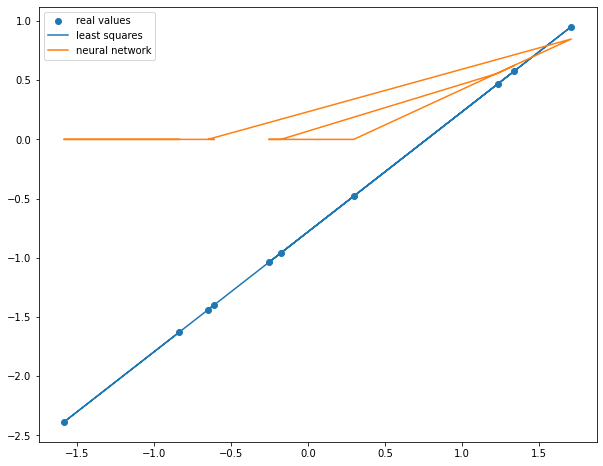

In [157]:
plt.figure(figsize=(10, 8))
plt.scatter(x, y, label='real values')
plt.plot(x, yls, label='least squares')
plt.plot(x, ynn, label='neural network')
plt.legend()
plt.show()